### Schlagwortanalyse.ipynb 

Dieses Notebook liefert eine quantitativ-explorative Übersicht über die Wortfrequenzen zu den Verkehrsunternehmen 
Berliner Verkehrsbetriebe (BVG), Hamburger Verkehrsverbund (HVV) und Münchner Verkehrsgesellschaft (MVG). 
Ziel ist es, herauszufinden wer berichtet wie oft worüber.

Analysiert werden:
- die Häufigkeit der exakten Begriffe BVG, HVV und MVG
- die Wortformen, die mit diesen Begriffen beginnen 

Die Ergebnisse werden über die Jahre, nach Medienquellen und vordefinierten Clustern dargestellt.

#### 1. Import benötigte Pakete

In [1]:
# Standard
import os
import pandas as pd # Datenanalyse
import sqlite3  # Speicherung in SQLite-Datenbanken
from datetime import datetime # Datumsangaben

# Bearbeiten von HTML-Dateien
from bs4 import BeautifulSoup  # HTML auslesen und bereinigen
from collections import Counter

# Grafik
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Pfade
DATAPATH = "output/df_medien.csv" # Input-Datei
OUTPUT_FOLDER = os.path.join("..", "output") # Exportordner für Plots, Tabellen

In [3]:
# CSV-Dateien  einlesen
df_medien = pd.read_csv(DATAPATH)

#### 2. Datenexploration

In [4]:
# Anzahl Zeilen und Spalten
df_medien.shape

(48097645, 5)

In [5]:
# Spaltennamen
df_medien.columns

Index(['count', 'word', 'source', 'date', 'filename'], dtype='object')

In [6]:
# Überblick Datentypen
df_medien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48097645 entries, 0 to 48097644
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   count     int64 
 1   word      object
 2   source    object
 3   date      object
 4   filename  object
dtypes: int64(1), object(4)
memory usage: 1.8+ GB


In [7]:
# Statistischen Merkmale für numerische Spalten (einschließlich Mittelwert, Median, Min-/Max-Werte und Standardabweichung erzeugen
df_medien.describe()

,count
count,4.809764e+07
mean,1.540577e+00
std,3.000133e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,2.470000e+02


In [8]:
# Prüfung fehlende Werte
df_medien.isnull().sum()

count          0
word        1951
source         0
date           0
filename       0
dtype: int64

In [9]:
# Anzahl fehlende Werte nach Medium
df_medien[df_medien["word"].isnull()]["source"].value_counts()

source
sz              274
zeit            187
boerse          183
ntv             182
heise           148
welt            120
stern           110
tagesspiegel     92
spiegel          85
taz              84
berliner         80
faz              78
mm               71
wiwo             60
dlf              51
netzpolitik      44
handelsblatt     41
tagesschau       31
abendblatt       18
dw-de             8
pioneer           4
Name: count, dtype: int64

In [10]:
# Beispiel für fehlende Werte
df_medien[df_medien["word"].isnull()].sample(5)

,count,word,source,date,filename
11188404,2,NaN,boerse,2025-04-07,2025-04-07-boerse.html
29297814,7,NaN,zeit,2024-11-29,2024-11-29-zeit.html
18430713,1,NaN,sz,2022-09-05,2022-09-05-sz.html
35377928,1,NaN,berliner,2024-03-12,2024-03-12-berliner.html
15939001,2,NaN,zeit,2022-03-11,2022-03-11-zeit.html


In [11]:
# Aus welcher Datei entstehen fehlende Wörter zeigen
df_medien[df_medien["word"].isnull()]["filename"].value_counts()

filename
2023-05-23-sz.html             2
2024-11-24-zeit.html           2
2024-11-25-zeit.html           2
2022-05-23-berliner.html       2
2023-01-21-berliner.html       2
                              ..
2024-12-30-netzpolitik.html    1
2024-12-31-netzpolitik.html    1
2025-01-01-netzpolitik.html    1
2025-01-02-netzpolitik.html    1
2024-12-19-netzpolitik.html    1
Name: count, Length: 1945, dtype: int64

In [12]:
# Ausgewählte Dateien für die Prüfung definieren
dateien = [
    "2023-05-23-sz.html",
    "2024-11-24-zeit.html",
    "2022-05-23-berliner.html",
    "2024-11-26-tagesspiegel.html",
    "2021-06-07-dlf.html "
]

In [13]:
# Funktion für die Sichtung von ausgewählten Dateien mit fehlenden Werten
for fname in dateien:
    pfad = os.path.join("..","input", "raw", "data-lake", fname)
    print(f"\n{fname}")

    try:
        with open(pfad, "r", encoding="utf-8") as f:
            html = f.read()
        soup = BeautifulSoup(html, "html.parser")
        text = soup.get_text(separator=" ").lower()
        print(text[:500])  # oder [:1000] für mehr Inhalt
    except Exception as e:
        print(f"Fehler: {e}")


2023-05-23-sz.html

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 aktuelle nachrichten und kommentare - sz.de 
 
 
 zum hauptinhalt springen sz.de zeitung magazin jetzt alle sz-produkte  login menü menü suchen süddeutsche zeitung abos login menü menü suchen süddeutsche zeitung meine sz sz plus ukraine türkei politik wirtschaft meinung panorama sport münchen kultur medien bayern reportage gesellschaft stil wissen karriere gesundheit bildung reise auto mehr 
 
 
 krise am bau : so kaputt ist der wohnungsmarkt eine niederlage in za

2024-11-24-zeit.html

 
 
 
 
 zeit online | nachrichten, news, hintergründe und debatten 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
   
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 zum inhalt springen 
 
 lesezeichen   
 
 
 
 
 
 
 
 
 menü 
 
 
 
 
 
 
 
 suchen 
 
 
 suche 
 
 
   
 
 
 
 
 startseite 
   
 
 
 
 
   exklusive a

In [14]:
# Fehlende Werte löschen, weil sie keine Infos enthalten
df_medien = df_medien[df_medien["word"].notna()]

In [25]:
# Neue Spalte Jahr für die Analyse
df_medien["date"] = pd.to_datetime(df_medien["date"], errors="coerce")
df_medien["year"] = df_medien["date"].dt.year

#### 3. Schlagwortanalyse

In [26]:
# Neuer DataFrame für Filter
df_oepnv = df_medien.copy()

In [27]:
# Spalten
df_oepnv.columns

Index(['count', 'word', 'source', 'date', 'filename', 'year'], dtype='object')

##### 3.1 Häufigkeit der exakten Begriffe BVG, HVV und MVG

In [ ]:
# 1. Häufigkeit der Begriffe BVG, MVG, HVV in den ausgewählten Medien
# Filter Begriffe
treffer = df_oepnv[df_oepnv["word"].isin(["bvg", "mvg", "hvv"])]

# Absolute Häufigkeiten
wert_counts = treffer["word"].value_counts()

# in % 
wert_prozent = wert_counts / wert_counts.sum() * 100

# Ergebnis anzeigen
print("Anzahl der Begriffe BVG, MVG, HVV:")
print(df_oepnv[df_oepnv["word"].isin(["bvg", "mvg", "hvv"])]["word"].value_counts())
print("Anteil der Begriffe BVG, MVG, HVV in %:")
print(wert_prozent.round(2)) # mit 2 Dezimalstellen

Anzahl der Begriffe BVG, MVG, HVV:
word
bvg    1362
hvv     564
mvg     125
Name: count, dtype: int64
Anteil der Begriffe BVG, MVG, HVV in %:
word
bvg    66.41
hvv    27.50
mvg     6.09
Name: count, dtype: float64


In [ ]:
# 2. Häufigkeit der Begriffe BVG, MVG, HVV nach Jahren
# Gruppierung: Nennungen je Jahr und Begriff summieren
oepnv_jahre = treffer.groupby(["year", "word"])["count"].sum().unstack().fillna(0).astype(int)

# Anzeigen
print(oepnv_jahre)

word  bvg  hvv  mvg
year               
2021  485   35   41
2022  497  407   65
2023  343  165   16
2024  513  165   17
2025  300   35    2


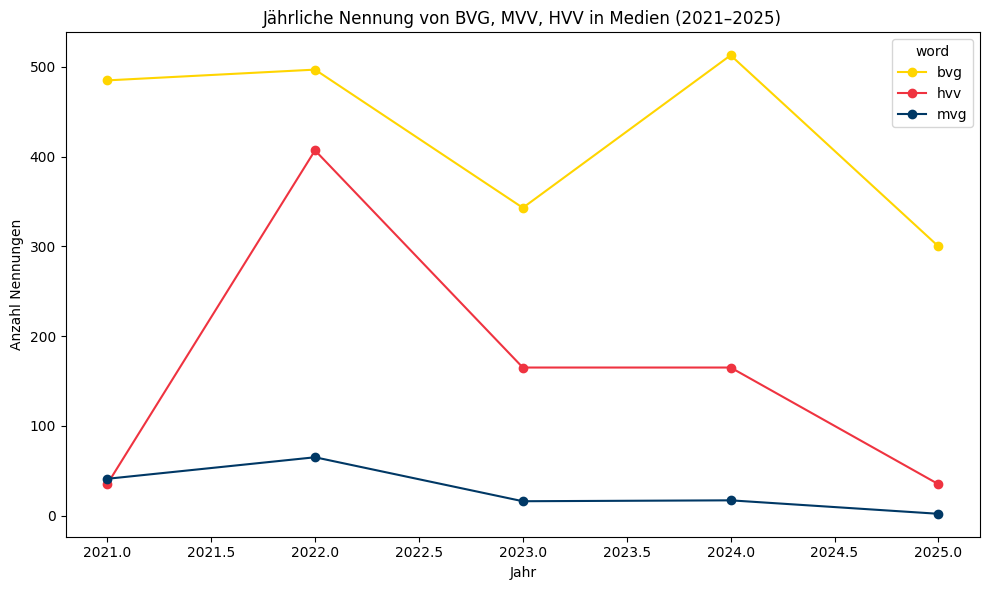

In [ ]:
# Plot: Darstellung Häufigkeit der Begriffe BVG, MVG, HVV nach Jahren
ax = oepnv_jahre.plot(
    kind="line",
    marker="o",
    figsize=(10, 6),
    color=[farben[col] for col in oepnv_jahre.columns]  # Farbenzuteilung pro Spalte
)

# Darstellung 
plt.title("Jährliche Nennung von BVG, MVV, HVV in Medien (2021–2025)")
plt.ylabel("Anzahl Nennungen")
plt.xlabel("Jahr")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Häufigkeit der Begriffe BVG, MVG, HVV nach Medien
# Gruppierung: Häufigkeit der Begriffe je Medium und Begriff summieren
oepnv_quellen = treffer.groupby(["source", "word"])["count"].sum().unstack().fillna(0).astype(int)
# in %
oepnv_quellen_prozent = oepnv_quellen.div(oepnv_quellen.sum(axis=1), axis=0) * 100

# Anzeigen
print(oepnv_quellen.sort_index())
print(oepnv_quellen_prozent.round(2).sort_index()) # 2 Kommastellen

word           bvg  hvv  mvg
source                      
abendblatt       2  796    0
berliner       742    0    0
boerse           0    0  116
dlf              1    0    0
faz              4    0    0
heise            7    0    0
mm               8    0    0
ntv             16    3    1
spiegel          9    0    0
stern            7    2    0
sz               4    1   23
t3n              6    0    0
tagesspiegel  1217    0    0
taz             94    0    0
welt            11    1    1
zeit            10    4    0
word             bvg    hvv     mvg
source                             
abendblatt      0.25  99.75    0.00
berliner      100.00   0.00    0.00
boerse          0.00   0.00  100.00
dlf           100.00   0.00    0.00
faz           100.00   0.00    0.00
heise         100.00   0.00    0.00
mm            100.00   0.00    0.00
ntv            80.00  15.00    5.00
spiegel       100.00   0.00    0.00
stern          77.78  22.22    0.00
sz             14.29   3.57   82.14
t3n       

In [ ]:
# 4. Häufigkeit der Begriffe BVG, MVG, HVV nach Medien und Jahren
# Pivot-Tabelle für bessere Lesbarkeit
for wort in ["bvg", "mvg", "hvv"]:
    df_tmp = treffer[treffer["word"] == wort]
    pivot = df_tmp.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)
    print(f"\nPivot-Tabelle für {wort.upper()}:")
    display(pivot)


Pivot-Tabelle für BVG:


source,abendblatt,berliner,dlf,faz,heise,mm,ntv,spiegel,stern,sz,t3n,tagesspiegel,taz,welt,zeit
year,,,,,,,,,,,,,,,
2021,0,70,0,0,1,0,0,0,3,0,0,404,7,0,0
2022,0,69,0,2,0,0,1,5,1,0,0,410,7,1,1
2023,2,160,0,0,1,8,0,0,0,1,6,138,27,0,0
2024,0,288,0,0,3,0,4,2,2,2,0,174,31,5,2
2025,0,155,1,2,2,0,11,2,1,1,0,91,22,5,7



Pivot-Tabelle für MVG:


source,boerse,ntv,sz,welt
year,,,,
2021,37,0,3,1
2022,60,0,5,0
2023,4,0,12,0
2024,15,0,2,0
2025,0,1,1,0



Pivot-Tabelle für HVV:


source,abendblatt,ntv,stern,sz,welt,zeit
year,,,,,,
2021,33,2,0,0,0,0
2022,403,0,0,0,0,4
2023,164,0,1,0,0,0
2024,161,1,1,1,1,0
2025,35,0,0,0,0,0


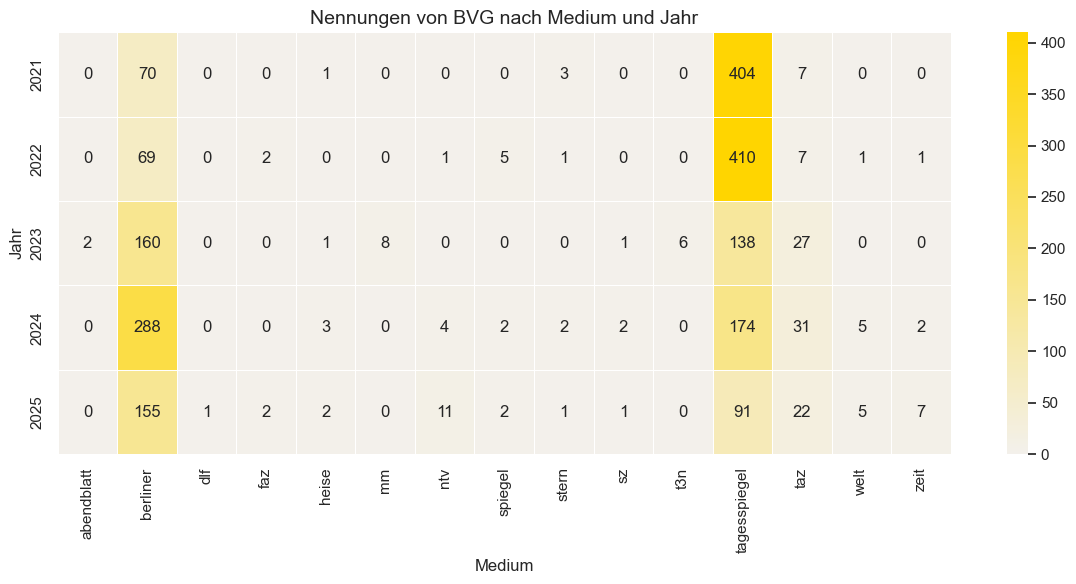

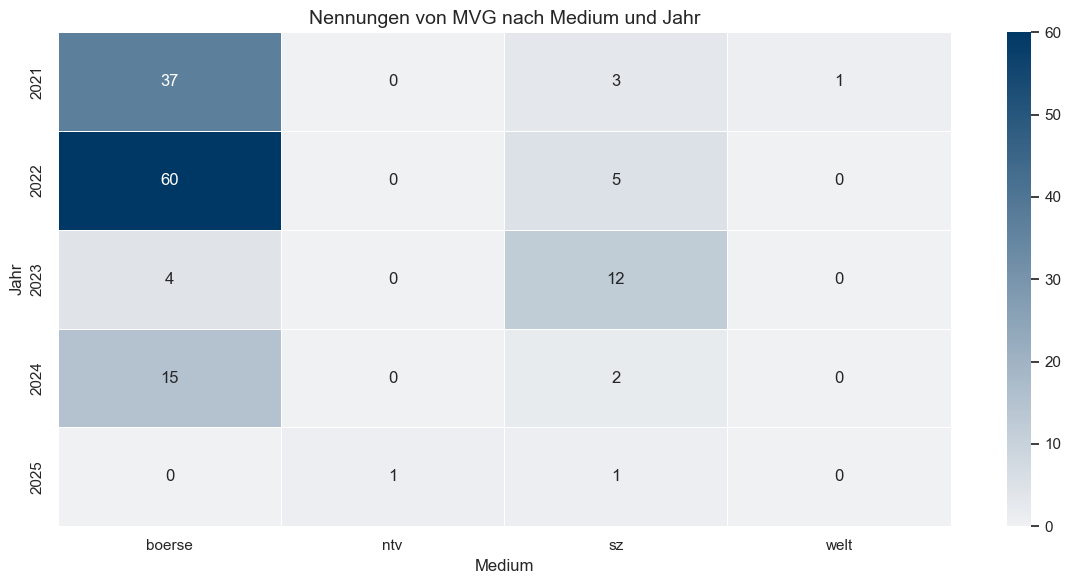

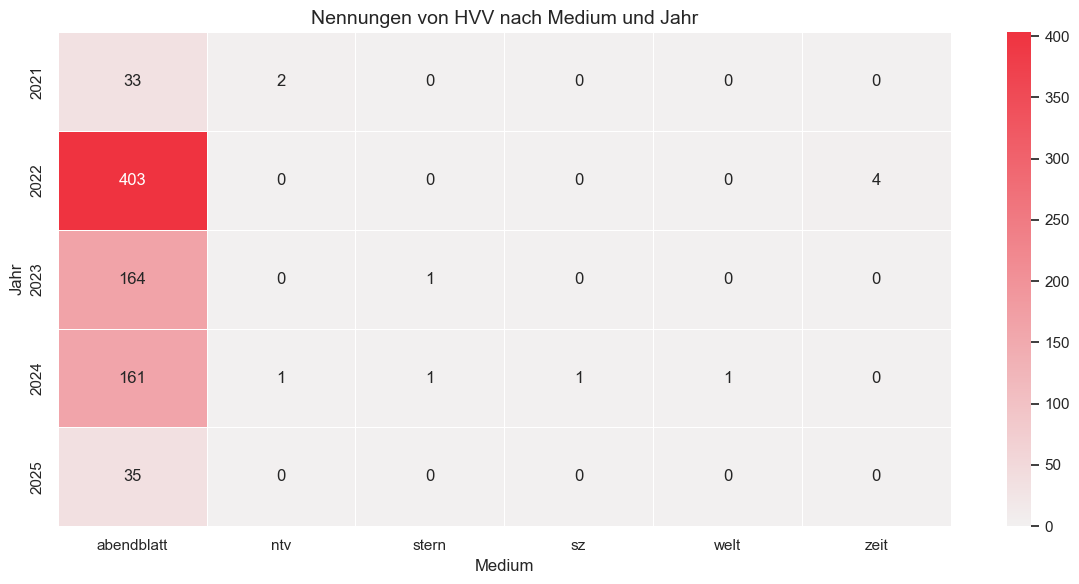

In [ ]:
# Plot: Heatmap Nennungen der Begriffe BVG, MVG, HVV nach Medien und Jahren
# Vorbereitung
sns.set(style="whitegrid")

# Schleife über die Verkehrsunternehmen
for wort in ["bvg", "mvg", "hvv"]:
    # Filtern
    df_tmp = treffer[treffer["word"] == wort]

    # Pivot-Tabelle: Zeilen = Jahr, Spalten = Medium
    pivot = df_tmp.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)

    # Heatmap zeichnen
    plt.figure(figsize=(12, 6))
    cmap_farbe = farben.get(wort, "gray")

    # Farbschema auf Basis einer Einzelfarbe
    sns.heatmap(pivot, cmap=sns.light_palette(cmap_farbe, as_cmap=True), annot=True, fmt="d", linewidths=0.5)

    # Darstellung
    plt.title(f"Nennungen {wort.upper()} nach Medium und Jahr", fontsize=14)
    plt.xlabel("Medium")
    plt.ylabel("Jahr")
    plt.tight_layout()
    plt.show()

In [ ]:
# 6. Häufigkeit der Begriffe BVG, MVG, HVV nach Medien-Clustern
# Vorbereitung
# Erstellung Dictionary für Analyse nach Clustern
cluster_map = {
    # Öffentlich-rechtlich
    "dlf": "Öffentlich-rechtlich",
    "tagesschau": "Öffentlich-rechtlich",

    # Wirtschaftsmedien
    "handelsblatt": "Wirtschaft",
    "wiwo": "Wirtschaft",
    "mm": "Wirtschaft",
    "boerse": "Wirtschaft",

    # Große Medien
    "sz": "Große Medien",
    "zeit": "Große Medien",
    "faz": "Große Medien",
    "taz": "Große Medien",
    "welt": "Große Medien",
    "spiegel": "Große Medien",
    "stern": "Große Medien",

    # Regionale Medien
    "abendblatt": "Regional",
    "berliner": "Regional",
    "tagesspiegel": "Regional",

    # Digitale Nachrichtenportale
    "ntv": "Digital",
    "pioneer": "Digital",
    "dw-de": "Digital",

    # Technologie
    "heise": "Technologie",
    "golem": "Technologie",
    "netzpolitik": "Technologie",
    "t3n": "Technologie"
}

In [ ]:
# Häufigkeit der Begriffe BVG, MVG, HVV nach Medien-Clustern
# Medien-Cluster zuordnen
treffer["cluster"] = treffer["source"].map(cluster_map)
# Kopie nach SettingWithCopyWarning
treffer = treffer.copy()

In [54]:
# Cluster-Spalte zuordnen
treffer["cluster"] = treffer["source"].map(cluster_map)

# Pivot-Tabelle nach Jahr und Cluster
pivot_cluster = treffer.groupby(["year", "cluster", "word"])["count"] \
    .sum().unstack().fillna(0).astype(int)

# Ausgabe
display(pivot_cluster)

word                       bvg  hvv  mvg
year cluster                            
2021 Digital                 0    2    0
     Große Medien           10    0    4
     Regional              474   33    0
     Technologie             1    0    0
     Wirtschaft              0    0   37
2022 Digital                 1    0    0
     Große Medien           17    4    5
     Regional              479  403    0
     Wirtschaft              0    0   60
2023 Große Medien           28    1   12
     Regional              300  164    0
     Technologie             7    0    0
     Wirtschaft              8    0    4
2024 Digital                 4    1    0
     Große Medien           44    3    2
     Regional              462  161    0
     Technologie             3    0    0
     Wirtschaft              0    0   15
2025 Digital                11    0    1
     Große Medien           40    0    1
     Regional              246   35    0
     Technologie             2    0    0
     Öffentlich-rechtlich    1    0    0

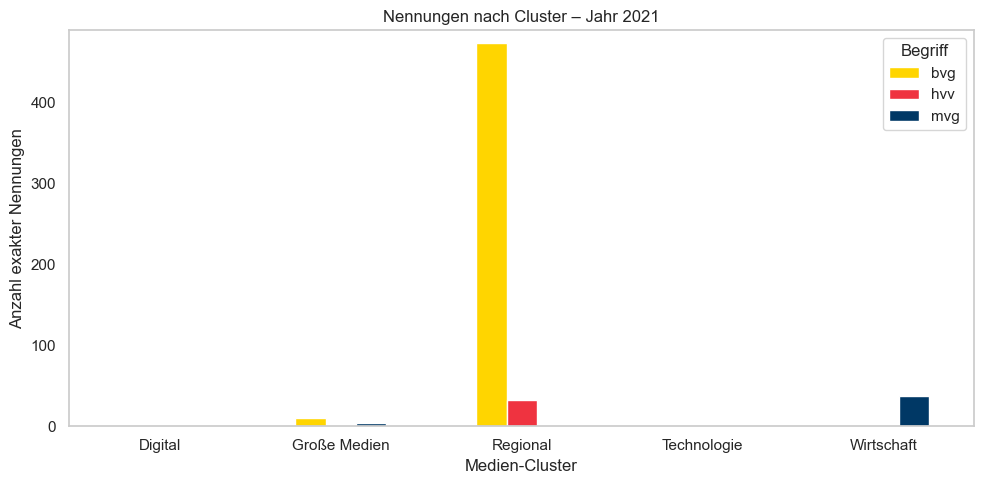

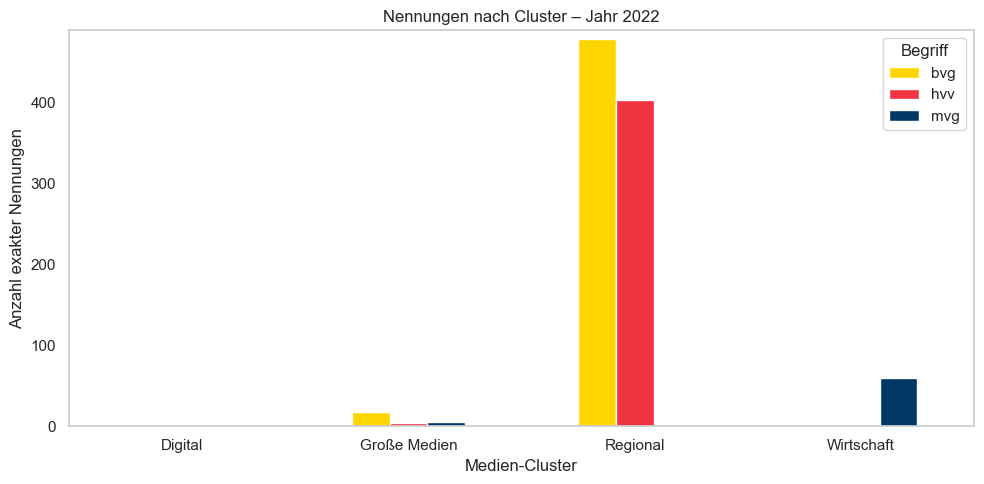

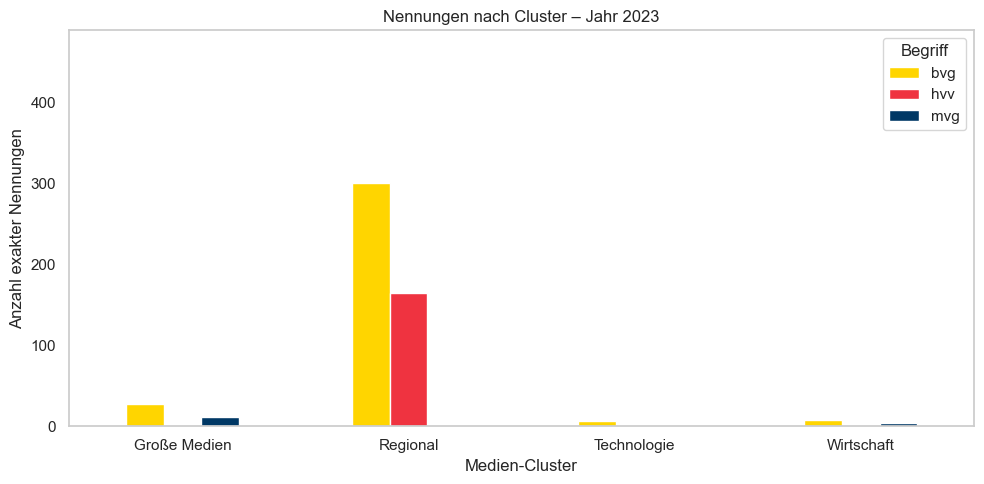

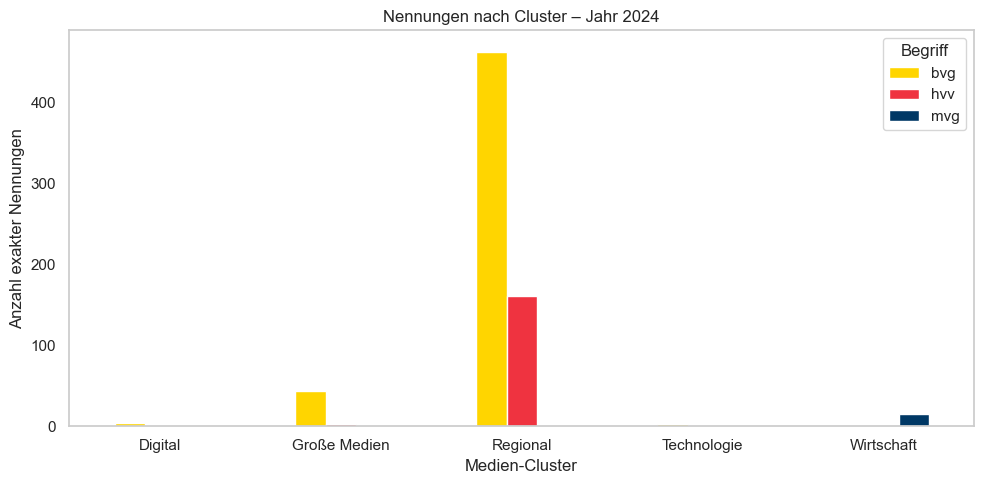

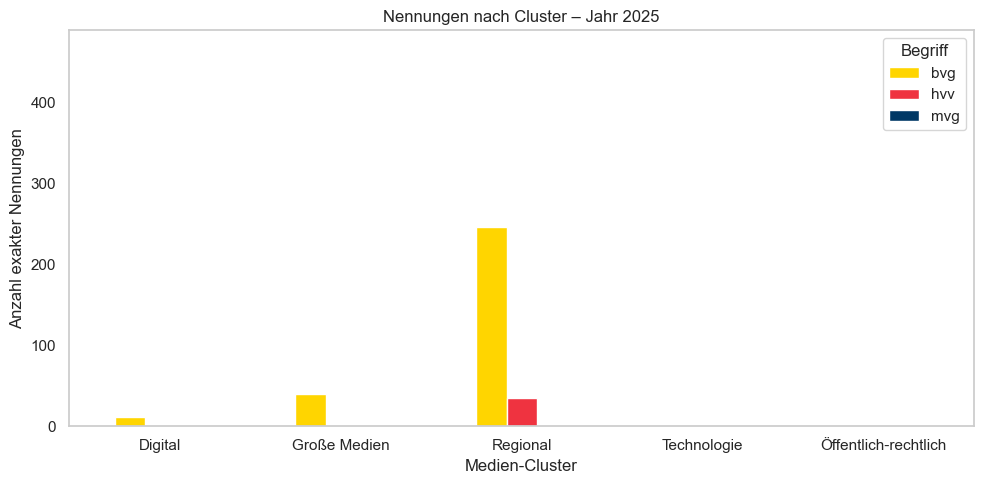

In [62]:
# Liste aller Jahre im Datensatz
jahre = pivot_cluster.index.get_level_values("year").unique()

# Gleiche Skalierung für alle Balkendiagramme
# Maximalwert über alle Jahre & Begriffe
max_wert = pivot_cluster.max().max()

for year in jahre:
    df_plot = pivot_cluster.loc[year]

    # Zeichne gruppiertes Balkendiagramm
    ax = df_plot.plot(
        kind="bar",
        figsize=(10, 5),
        color=[farben.get(k, "gray") for k in df_plot.columns]
    )

    plt.title(f"Nennungen nach Cluster – Jahr {year}")
    plt.ylabel("Anzahl exakter Nennungen")
    plt.xlabel("Medien-Cluster")
    plt.xticks(rotation=0)  # Beschriftung horizontal
    plt.ylim(0, max_wert + 10) # Skalierung mit Puffer
    plt.legend(title="Begriff")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

##### 3.2 Wortformen, die mit den Begriffen BVG, HVV und MVG beginnen 

In [ ]:
# 1. Wortformen, die BVG, MVG oder HVV beinhalten 
df_oepnv = df_medien[df_medien["word"].str.contains("bvg|mvg|hvv", na=False)]
print("Häufigkeit der Wortformen BVG, MVG, HVV:")
print(df_oepnv["word"].value_counts())

In [ ]:
# Plot: Wordclouds für Wortformen, die mit BVG, MVG oder HVV beginnen
# Vorbereitung
# Begriffsliste
begriffsliste = ["bvg", "mvg", "hvv"]

# Farbdefinitionen nach CI der Verkerhsunternehmen
bvg_color = "#FFD500"   # BVG-Gelb
mvv_color = "#003865"   # MVV-Blau
hvv_color = "#EF3340"   # HVV-Rot

# Dictionary für die CI-Farben
farben = {
    "bvg": bvg_color,
    "mvg": mvv_color,
    "hvv": hvv_color
}

In [ ]:
# Plot: Wordclouds für Wortformen, die mit BVG, MVG oder HVV beginnen
# Funktion: Für jeden Begriff wird eine Wordcloud generiert

for begriff in begriffsliste:
    # Filter: alle Wörter, die mit BVG-, MVG- oder HVV- beginnen 
    # exakte Begriffe ausschließen
    df_wortformen = df_medien[
        (df_medien["word"].str.startswith(begriff, na=False)) & 
        (df_medien["word"] != begriff)
    ]

    # Häufigkeit je Wortform summieren
    wortformen = df_wortformen.groupby("word")["count"].sum().sort_values(ascending=False).head(50)

    # für Wordcloud in Dictionary umwandeln
    wort_dict = wortformen.to_dict()

    # CI-Farben 
    farbe = farben.get(begriff, "#000000")  # fallback: schwarz, falls nicht definiert

    # Wordcloud erzeugen 
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        color_func=lambda *args, **kwargs: farbe
    ).generate_from_frequencies(wort_dict)

    # Darstellung 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wortwolke: {begriff.upper()}-Wortformen", fontsize=16)
    plt.tight_layout()
    plt.show()